<a href="https://colab.research.google.com/github/mgnarag/painting_restoration/blob/main/color%20test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive/My\ Drive
file_path = "/content/drive/MyDrive/Baumgartner screenshots/"

## Installing packages

In [22]:
import time
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from PIL import Image, ImageOps
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

import cv2
from skimage import color

from tensorflow import keras
from PIL import Image, ImageOps
import numpy as np
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 236958876
from sklearn.model_selection import train_test_split

## Defining functions

In [23]:
def rgb_lab_normalized(im):
    rgb_array = np.array(im) # Convert to numpy array
    rgb_array_normalized = rgb_array / 255.0 # Normalize RGB values from 0 to 1
    lab_array_normalized = color.rgb2lab(rgb_array_normalized) # Convert RGB to LAB colorspace
    lab_array_normalized[..., 0] = (lab_array_normalized[..., 0]) / 100.0 # Scale LAB values to range [0, 1]
    lab_array_normalized[..., 1] = (lab_array_normalized[..., 1] + 128) / 255.0
    lab_array_normalized[..., 2] = (lab_array_normalized[..., 2] + 128) / 255.0
    lab_image_normalized = Image.fromarray((lab_array_normalized * 255).astype(np.uint8), mode='LAB')# Convert LAB array back to image
    return lab_image_normalized

## Testing the model

### **Model RGB:**

In [24]:
n_size = 8
size = 8

def rgb_L_ab(rgb_image, test_L):
    lab_array = color.rgb2lab(np.array(rgb_image))# Convert RGB to LAB colorspace
    lab_array[..., 0] = test_L #Change L channel to input
    rgb_array = color.lab2rgb(lab_array)# Convert back LAB to RGB colorspace
    rgb_array = (rgb_array*255).astype(np.uint8)# Scale RGB values back to the range [0, 255]
    rgb_array = Image.fromarray(rgb_array, mode='RGB')# Convert RGB array back to image
    return rgb_array

autoencoder = keras.models.load_model(file_path + 'Model/portion only/unet_'+str(n_size)+'_rgb')

input_folder_path = file_path+ "Testing/portion only/color test/"
input_files = sorted(os.listdir(input_folder_path))

for index, image_file in enumerate(input_files):
    image_path = os.path.join(input_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    test_L = color.rgb2lab(np.array(image))
    test_L = test_L[..., 0]
    image = np.array(image).astype(np.float32) / 255.0# Convert image to numpy array and scale pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)# Expand dimensions to match the expected input shape (1, 8, 8, 3)

    decoded_imgs = autoencoder.predict(image)
    final = (decoded_imgs*255).astype('uint8')

    #----------------TEST ON FULL RGB--------------------#
    final_rgb = final
    final_rgb = np.squeeze(final_rgb)
    reconstructed_rgb = Image.fromarray(final_rgb)
    reconstructed_rgb.save(file_path + "Testing/portion only/color test out/"+"Method_1_"+image_file)


    #plt.figure(), plt.imshow(reconstructed_rgb)

    #----------------TEST ON L from input and AB from convert RGB2LAB of model--------------------#
    final_lab = rgb_L_ab(final_rgb, test_L)
    final_lab = np.squeeze(final_lab)
    reconstructed_lab = Image.fromarray(final_lab)
    reconstructed_lab.save(file_path + "Testing/portion only/color test out/"+"Method_2_"+image_file)
    #plt.figure(), plt.imshow(reconstructed_lab)

1/1 [==============================] - 0s 26ms/step


### **Model LAB:**

In [25]:
from tensorflow import keras
from PIL import Image, ImageOps
import numpy as np
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 236958876

n_size = 8
size = n_size

def lab_rgb_unnormalized(lab_image):
    lab_array = np.array(lab_image/255)# Convert LAB image to numpy array
    lab_array[..., 0] = lab_array[..., 0] * 100.0# Scale LAB values back to their original ranges
    lab_array[..., 1] = (lab_array[..., 1] * 255.0) - 128
    lab_array[..., 2] = (lab_array[..., 2] * 255.0) - 128
    rgb_array_unnormalized = color.lab2rgb(lab_array)# Convert LAB to RGB colorspace
    rgb_array_unnormalized = (rgb_array_unnormalized * 255).astype(np.uint8)# Scale RGB values back to the range [0, 255]
    rgb_image_unnormalized = Image.fromarray(rgb_array_unnormalized, mode='RGB')# Convert RGB array back to image
    return rgb_image_unnormalized

def AB_rgb_unnormalized(lab_image, test_L):
    lab_array = np.array(lab_image/255)# Convert LAB image to numpy array
    lab_array[..., 0] = test_L #replacing L from the original input
    lab_array[..., 1] = (lab_array[..., 1] * 255.0) - 128
    lab_array[..., 2] = (lab_array[..., 2] * 255.0) - 128
    rgb_array_unnormalized = color.lab2rgb(lab_array)# Convert LAB to RGB colorspace
    rgb_array_unnormalized = (rgb_array_unnormalized * 255).astype(np.uint8)# Scale RGB values back to the range [0, 255]
    rgb_image_unnormalized = Image.fromarray(rgb_array_unnormalized, mode='RGB')# Convert RGB array back to image
    return rgb_image_unnormalized


autoencoder = keras.models.load_model(file_path + 'Model/portion only/unet_'+str(n_size)+'_lab')

input_folder_path = file_path+ "Testing/portion only/color test/"
input_files = sorted(os.listdir(input_folder_path))

for index, image_file in enumerate(input_files):
    image_path = os.path.join(input_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    test_L = color.rgb2lab(np.array(image))
    test_L = test_L[..., 0]
    image = rgb_lab_normalized(image)
    image = np.array(image).astype(np.float32) / 255.0# Convert image to numpy array and scale pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)# Expand dimensions to match the expected input shape (1, 8, 8, 3)

    decoded_imgs = autoencoder.predict(image)
    final = (decoded_imgs*255).astype('uint8')

    #----------------TEST ON FULL LAB--------------------#
    final_LAB = lab_rgb_unnormalized(np.squeeze(final))
    final_LAB = np.squeeze(final_LAB)
    reconstructed_LAB = Image.fromarray(final_LAB)
    reconstructed_LAB.save(file_path + "Testing/portion only/color test out/"+"Method_3_"+image_file)
    #plt.figure(), plt.imshow(reconstructed_LAB)

    #----------------TEST ON L from input and AB from model--------------------#
    final_L_AB = AB_rgb_unnormalized(np.squeeze(final), test_L)
    final_L_AB = np.squeeze(final_L_AB)
    reconstructed_L_AB = Image.fromarray(final_L_AB)
    reconstructed_L_AB.save(file_path + "Testing/portion only/color test out/"+"Method_4_"+image_file)
    #plt.figure(), plt.imshow(reconstructed_L_AB)

1/1 [==============================] - 0s 25ms/step


### **Model AB**

In [26]:
from tensorflow import keras
from PIL import Image, ImageOps
import numpy as np
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 236958876

n_size = 8
size = n_size

def rgb_lab_normalized(im):
    rgb_array = np.array(im) # Convert to numpy array
    rgb_array_normalized = rgb_array / 255.0 # Normalize RGB values from 0 to 1
    lab_array_normalized = color.rgb2lab(rgb_array_normalized) # Convert RGB to LAB colorspace
    lab_array_normalized[..., 0] = (lab_array_normalized[..., 0]) / 100.0 # Scale LAB values to range [0, 1]
    lab_array_normalized[..., 1] = (lab_array_normalized[..., 1] + 128) / 255.0
    lab_array_normalized[..., 2] = (lab_array_normalized[..., 2] + 128) / 255.0
    lab_image_normalized = Image.fromarray((lab_array_normalized * 255).astype(np.uint8), mode='LAB')# Convert LAB array back to image
    return lab_image_normalized

def AB_rgb_unnormalized(ab_image, test_L):
    ab_array = np.array(ab_image)/255# Convert LAB image to numpy array
    ab_array[..., 0] = (ab_array[..., 0] * 255.0) - 128
    ab_array[..., 1] = (ab_array[..., 1] * 255.0) - 128
    LAB_array = np.dstack((test_L, ab_array[:,:,0], ab_array[:,:,1]))
    rgb_array_unnormalized = color.lab2rgb(LAB_array)# Convert LAB to RGB colorspace
    rgb_array_unnormalized = (rgb_array_unnormalized * 255).astype(np.uint8)# Scale RGB values back to the range [0, 255]
    rgb_image_unnormalized = Image.fromarray(rgb_array_unnormalized, mode='RGB')# Convert RGB array back to image
    return rgb_image_unnormalized

autoencoder = keras.models.load_model(file_path + 'Model/portion only/unet_'+str(n_size)+'_ab')

input_folder_path = file_path+ "Testing/portion only/color test/"
input_files = sorted(os.listdir(input_folder_path))

for index, image_file in enumerate(input_files):
    image_path = os.path.join(input_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    test_L = color.rgb2lab(np.array(image))
    test_L = np.array(test_L[..., 0]).astype('uint8')
    image = rgb_lab_normalized(image)
    image = np.array(image).astype(np.float32) / 255.0# Convert image to numpy array and scale pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)# Expand dimensions to match the expected input shape (1, 8, 8, 3)

    decoded_imgs = autoencoder.predict(image[:,:,:,1:3])
    final = (decoded_imgs*255).astype('uint8')

    #----------------TEST ON L from input and AB from model--------------------#
    final_L_AB = AB_rgb_unnormalized(np.squeeze(final), test_L)
    final_L_AB = np.squeeze(final_L_AB)
    reconstructed_L_AB = Image.fromarray(final_L_AB)
    reconstructed_L_AB.save(file_path + "Testing/portion only/color test out/"+"Method_5_"+image_file)
    #plt.figure(), plt.imshow(reconstructed_L_AB)

1/1 [==============================] - 0s 43ms/step


### **Model AB plus Model L**

In [159]:

from tensorflow import keras
from PIL import Image, ImageOps
import numpy as np
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 236958876

n_size = 8
size = 8

def rgb_lab_normalized(im):
    rgb_array = np.array(im) # Convert to numpy array
    rgb_array_normalized = rgb_array / 255.0 # Normalize RGB values from 0 to 1
    lab_array_normalized = color.rgb2lab(rgb_array_normalized) # Convert RGB to LAB colorspace
    lab_array_normalized[..., 0] = (lab_array_normalized[..., 0]) / 100.0 # Scale LAB values to range [0, 1]
    lab_array_normalized[..., 1] = (lab_array_normalized[..., 1] + 128) / 255.0
    lab_array_normalized[..., 2] = (lab_array_normalized[..., 2] + 128) / 255.0
    lab_image_normalized = Image.fromarray((lab_array_normalized * 255).astype(np.uint8), mode='LAB')# Convert LAB array back to image
    return lab_image_normalized

def L_AB_rgb_unnormalized(ab_image, final_L):
    ab_image = ab_image/255.0
    final_L = final_L/255.0
    final_L[..., 0] = final_L[..., 0]*100.0
    ab_image[..., 0] = (ab_image[..., 0] * 255.0) - 128
    ab_image[..., 1] = (ab_image[..., 1] * 255.0) - 128
    LAB_array = np.dstack((final_L, ab_image[:,:,0], ab_image[:,:,1]))
    rgb_array_unnormalized = color.lab2rgb(LAB_array)# Convert LAB to RGB colorspace
    rgb_array_unnormalized = (rgb_array_unnormalized * 255).astype(np.uint8)# Scale RGB values back to the range [0, 255]
    rgb_image_unnormalized = Image.fromarray(rgb_array_unnormalized, mode='RGB')# Convert RGB array back to image
    return rgb_image_unnormalized


#----------------GETTING L--------------------#
autoencoder_L = keras.models.load_model(file_path + 'Model/portion only/unet_'+str(n_size)+'_L')
autoencoder_ab = keras.models.load_model(file_path + 'Model/portion only/unet_'+str(n_size)+'_ab')

input_folder_path = file_path+ "Testing/portion only/color test/"
input_files = sorted(os.listdir(input_folder_path))

for index, image_file in enumerate(input_files):
    image_path = os.path.join(input_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    image = rgb_lab_normalized(image)
    image = np.array(image).astype(np.float32) / 255.0# Convert image to numpy array and scale pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)# Expand dimensions to match the expected input shape (1, 8, 8, 3)

    decoded_imgs = autoencoder_L.predict(image[:,:,:,0:1])
    final_L = (decoded_imgs*255).astype('uint8')

#----------------GETTING AB--------------------#
    image_path = os.path.join(input_folder_path, image_file)
    image = Image.open(image_path).convert('RGB')
    image = rgb_lab_normalized(image)
    image = np.array(image).astype(np.float32) / 255.0# Convert image to numpy array and scale pixel values to [0, 1]
    image = np.expand_dims(image, axis=0)# Expand dimensions to match the expected input shape (1, 8, 8, 3)

    decoded_imgs = autoencoder_ab.predict(image[:,:,:,1:3])
    final_ab = (decoded_imgs*255).astype('uint8')


    #----------------TEST ON L from model and AB from model--------------------#
    final_L_AB = L_AB_rgb_unnormalized(np.squeeze(final_ab), np.squeeze(final_L, axis=0))
    final_L_AB = np.squeeze(final_L_AB)
    reconstructed_L_AB = Image.fromarray(final_L_AB)
    reconstructed_L_AB.save(file_path + "Testing/portion only/color test out/"+"Method_6_"+image_file)
    #plt.figure(), plt.imshow(reconstructed_L_AB)

1/1 [==============================] - 0s 27ms/step


In [164]:
from skimage import io, color
import numpy as np
from colormath.color_objects import LabColor
from colormath.color_diff import delta_e_cie2000

def calculate_delta_e(image1_path, image2_path):
    image1 = np.array(Image.open(image1_path).convert('RGB'))
    image2 = np.array(Image.open(image2_path).convert('RGB'))

    image1_lab = color.rgb2lab(image1)# Convert images from RGB to Lab color space
    image2_lab = color.rgb2lab(image2)
  # Compute the Delta E 2000 for each pixel
    delta_e_map = np.zeros(image1_lab.shape[:2])

    for i in range(image1_lab.shape[0]):
        for j in range(image1_lab.shape[1]):
            lab1 = LabColor(*image1_lab[i, j])
            lab2 = LabColor(*image2_lab[i, j])
            delta_e_map[i, j] = delta_e_cie2000(lab1, lab2)

    # Calculate the mean Delta E 2000 across all pixels
    mean_delta_e = np.mean(delta_e_map)
    return mean_delta_e

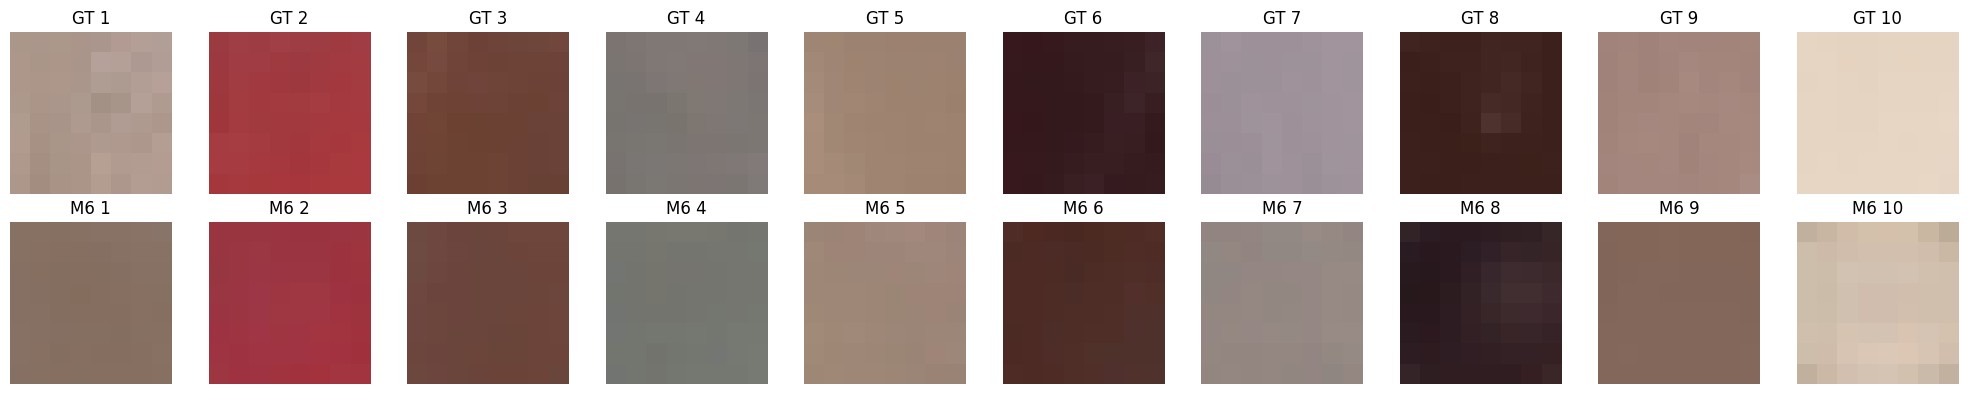

In [168]:
groundtruth_folder_path = file_path+ "Testing/portion only/color test gt/"
gt_files = sorted(os.listdir(groundtruth_folder_path))

out_methods_folder_path = file_path+ "Testing/portion only/color test out/"
out_files = sorted(os.listdir(out_methods_folder_path))

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))

for index in range(1,len(gt_files)+1):
    gt_path = groundtruth_folder_path + str(index) + '_output.png'
    out_path_1 = out_methods_folder_path + str('Method_6_') + str(index) + '_input.png'
    #print(calculate_delta_e(gt_path, out_path_1))
     # Load images
    # Load images
    gt_image = Image.open(gt_path)
    out_image_1 = Image.open(out_path_1)

    # Plot ground truth image
    ax_gt = axes[0, index-1]
    ax_gt.imshow(gt_image)
    ax_gt.axis('off')
    ax_gt.set_title(f'GT {index}')

    # Plot output image
    ax_out = axes[1, index-1]
    ax_out.imshow(out_image_1)
    ax_out.axis('off')
    ax_out.set_title(f'M6 {index}')

# Adjust layout
plt.tight_layout()
plt.show()


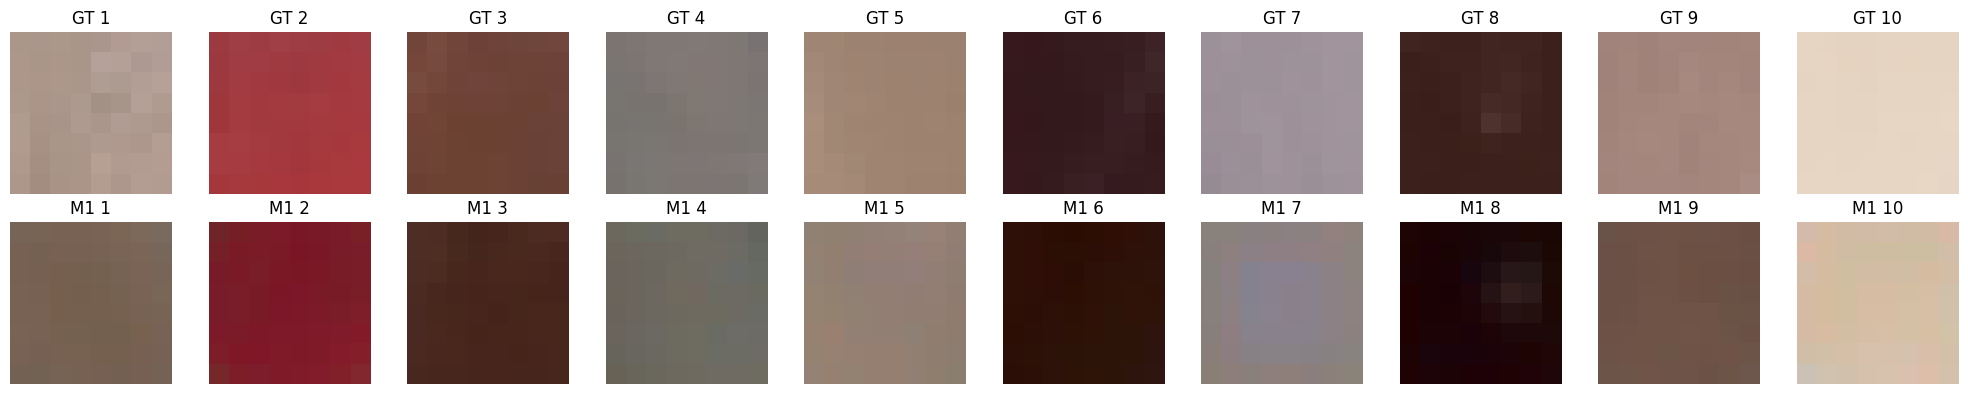

In [172]:
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 4))

for index in range(1,len(gt_files)+1):
    gt_path = groundtruth_folder_path + str(index) + '_output.png'
    out_path_1 = out_methods_folder_path + str('Method_4_') + str(index) + '_input.png'
    #print(calculate_delta_e(gt_path, out_path_1))
     # Load images
    # Load images
    gt_image = Image.open(gt_path)
    out_image_1 = Image.open(out_path_1)

    # Plot ground truth image
    ax_gt = axes[0, index-1]
    ax_gt.imshow(gt_image)
    ax_gt.axis('off')
    ax_gt.set_title(f'GT {index}')

    # Plot output image
    ax_out = axes[1, index-1]
    ax_out.imshow(out_image_1)
    ax_out.axis('off')
    ax_out.set_title(f'M1 {index}')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
4